# <div align="center">**Brevísima Introducción a Python**</div>


### **Para instalar módulos de Python usamos *!pip install nombre_módulo***

In [33]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Para redondear un número**

In [35]:
import numpy as np
print(np.round(np.pi,4))

3.1416


### **Listas en Python**

In [ ]:
lista = [0,1,2,3,4,5]
print(lista[1])
print(lista[0:-1])

1
[0, 1, 2, 3, 4]


### **Lazos (loops) *for***

In [36]:
for i in range(5):
  print("Hola mundo i=%d" %i)

Hola mundo i=0
Hola mundo i=1
Hola mundo i=2
Hola mundo i=3
Hola mundo i=4


In [37]:
lista = [i for i in range(10)]
lista

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### **Graficación con el módulo *matplotlib***

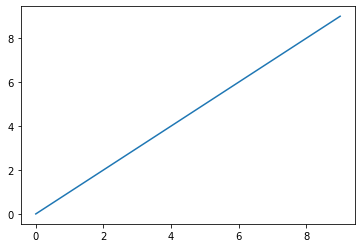

In [38]:
import matplotlib.pyplot as plt
plt.plot(lista)
plt.draw()

### **Lazos *while***

In [39]:
i = 10
while (i < 15):
  print(i,end=",")
  i = i + 1

10,11,12,13,14,

### **Funciones en Python**

In [40]:
def f(x):
  return 2*x
f(3)

6

### **Arreglos de numpy**

In [41]:
a = np.array([1,3,5.31,2,-10.3])
print("El mínimo es %2.3f y el mínimo %2.3e" %(a.min(),a.max()))

El mínimo es -10.300 y el mínimo 5.310e+00


In [ ]:
b=np.where(a<3) # da los índices donde se cumple la condición
print(b)

(array([0, 3, 4]),)


### **Uso de *if else***

In [42]:
a = [1,3,5,2,0]
for i in a:
  if i < 3 :
    print(i, " es < que 3")
  else:
    print(i, " es >= que 3")

1  es < que 3
3  es >= que 3
5  es >= que 3
2  es < que 3
0  es < que 3


# <div align="center">**Introducción a la Programación Cuántica usando Qiskit**</div>

### Primero instalamos el módulo *qiskit*

In [43]:
!pip install qiskit==0.39.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.22.2', 'qiskit-aer': '0.11.1', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

### También instalamos la librería *pylatexenc* para dibujar los diagramas con *MatplotlibDrawer*

In [45]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



## <div align="center">**Compuertas Cuánticas**</div>

### Recordemos que 
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

### para la compuerta X de Pauli

$$ X =\ket{0}\bra{1} + \ket{1}\bra{0}$$

$$ X \ket{0} = \ket{1}$$
$$ X \ket{1} = \ket{0}$$

### para la compuerta Y de Pauli
$$ Y =-i\ket{0}\bra{1} + i\ket{1}\bra{0}$$

$$ Y \ket{0}= i\ket{1}$$
$$ Y \ket{1}= -i\ket{0}$$

### para la compuerta Z de Pauli
$$ Z =\ket{0}\bra{0} - \ket{1}\bra{1}$$

$$ Z \ket{0}= \ket{0} $$
$$ Z \ket{1}= -\ket{1} $$

### para la compuerta H de Hadamard
$$ H =\frac{\ket{0}+\ket{1}}{\sqrt{2}} \bra{0}+ \frac{\ket{0}-\ket{1}}{\sqrt{2}} \bra{1}$$

$$ H \ket{0} =\frac{\ket{0}+\ket{1}}{\sqrt{2}}$$
$$ H \ket{1} =\frac{\ket{0}-\ket{1}}{\sqrt{2}}$$

### para la compuerta CNOT aplicada a 2 quibits, el primer bit (el que está a la derecha), se llama de control y el segundo se llama objetivo. Si el qubit de control es 1 el qubit objetivo se niega.
$$ CNOT \ket{00}= \ket{00}$$
$$ CNOT \ket{01}= \ket{11}$$
$$ CNOT \ket{10}= \ket{10}$$
$$ CNOT \ket{11}= \ket{01}$$


## <div align="center">**Un Primer Circuito Cuántico Arbitrario**</div>

### Ahora hacemos un primer circuito cuántico arbitrario en *qiskit*. 

### *Nota: El estado inicial de los qubits es $\ket{0}$*

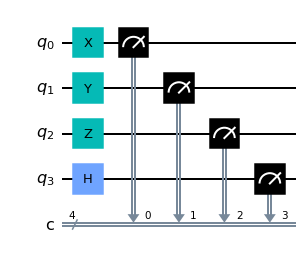

In [46]:
from qiskit import QuantumCircuit, Aer,execute
import numpy as np
import qiskit.quantum_info as qi
qc = QuantumCircuit(4,4) # Ponemos 4 qubits y 4 bits
# Aplicamos algunas compuertas
qc.x(0)
qc.y(1)
qc.z(2)
qc.h(3)
stv = qi.Statevector.from_instruction(qc)
# Ahora hacemos mediciones de cada qubit
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.draw(output='mpl')

### Las compuertas cuánticas aplicadas se expresan matemáticamente del modo siguiente:

$$ 
\begin{align*} (H \otimes Z \otimes Y \otimes X) |0000\rangle =\frac{\ket{0}+\ket{1}}{\sqrt{2}} \otimes|0\rangle\otimes i|1\rangle\otimes |1\rangle = \frac{i}{\sqrt{2}}|0011\rangle+ \frac{i}{\sqrt{2}}|1011\rangle
\end{align*}
$$


### El mismo resultado se obtiene con qiskit   para el  estado del sistema antes de las mediciones con la líneas 

*stv = qi.Statevector.from_instruction(qc)* 

y 

*stv.draw('latex', prefix="|\\psi\\rangle =")* 



In [47]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

### Enseguida simulamos este circuito usando el *backend qasm_simulator* y mostramos los resultados estadísticos de ejecutarlo muchas veces.

### Nota: La notación de *qiskit* pone el qubit más significativo a la izquierda igual que en los números binarios.

{'1011': 490, '0011': 510}


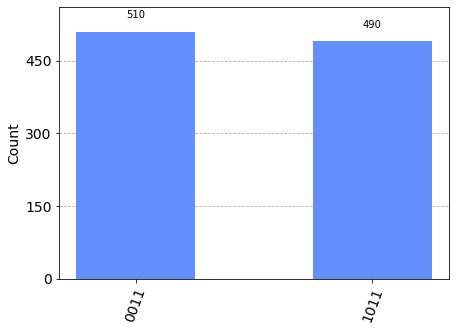

In [48]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend, shots=1000)
result = job.result()
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))

## <div align="center">**Circuito Cuántico para Superposición Simétrica**</div>

### Para poner en superposición uniforme a todos los qubits aplicamos la compuerta de Hadamard a todos los qubits

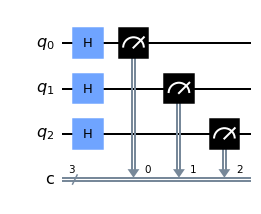

In [50]:
from qiskit import QuantumCircuit 
import qiskit.quantum_info as qi
qc = QuantumCircuit(3,3)
for qubit in range(3):
  qc.h(qubit)
stv = qi.Statevector.from_instruction(qc)
for qubit in range(3):
  qc.measure(qubit,qubit)
qc.draw("mpl")

### Las compuertas cuánticas aplicadas se expresan matemáticamente del modo siguiente:

$$ 
\begin{align*} (H \otimes H \otimes H ) |000\rangle =\frac{\ket{0}+\ket{1}}{\sqrt{2}} \otimes\frac{\ket{0}+\ket{1}}{\sqrt{2}}\otimes \frac{\ket{0}+\ket{1}}{\sqrt{2}} 
\end{align*}
$$

$$ 
\begin{align*} 
= \frac{1}{2\sqrt{2}}(|000\rangle+ |001\rangle+ |010\rangle+ |011\rangle+ |100\rangle+ |101\rangle+ |110\rangle+ |111\rangle)
\end{align*}
$$


### Usando qiskit obtenemos el mismo resultado para el estado del sistema antes de las mediciones:

In [51]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

### Enseguida simulamos este circuito

{'101': 131, '001': 139, '010': 99, '110': 141, '100': 117, '011': 127, '000': 135, '111': 111}


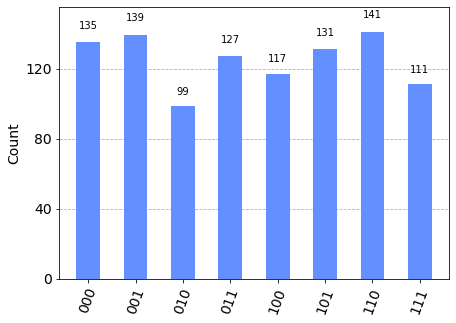

In [53]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend, shots=1000)
result = job.result()
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))

## <div align="center">**Entrelazamiento de 2 Qubits**</div>


### Ahora vamos a crear un estado entrelazado de Bell para 2 qubits

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

$$  \ket{\Phi^+} =\frac{\ket{00}+\ket{11}}{\sqrt{2}}$$

$$  \ket{\Phi^-} =\frac{\ket{00}-\ket{11}}{\sqrt{2}}$$

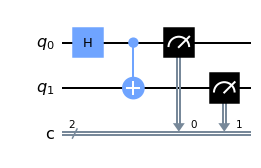

In [54]:
from qiskit import QuantumCircuit, Aer,execute
import qiskit.quantum_info as qi
qc = QuantumCircuit(2,2) # Ponemos 2 qubits y 2 bits
# Aplicamos algunas compuertas
qc.h(0) # Hadamard gate 
qc.cx(0,1) # CNOT gate
stv = qi.Statevector.from_instruction(qc)
for qubit in range(2):
  qc.measure(qubit,qubit)
qc.draw("mpl")

### Las compuertas cuánticas aplicadas se expresan matemáticamente del modo siguiente:

$$ 
\begin{align*} (CNOT  )(I \otimes H  ) |00\rangle =(CNOT  )\ket{0}\otimes\frac{\ket{0}+\ket{1}}{\sqrt{2}} = \frac{1}{\sqrt{2}}(CNOT)( |00\rangle+|01\rangle) = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)
\end{align*}
$$


### Usando qiskit vemos que el estado del sistema antes de las mediciones es el mismo que acabamos de obtener:

---



In [55]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

### Enseguida simulamos este circuito

{'00': 512, '11': 488}


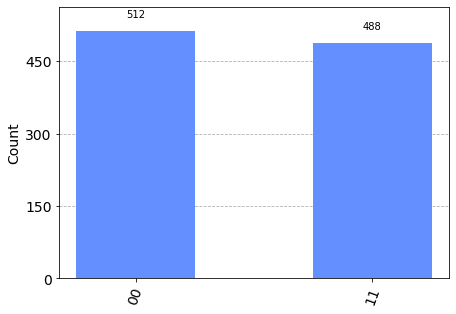

In [57]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend, shots=1000)
result = job.result()
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))

## <div align="center">**Entrelazamiento de 3 Qubits**</div>

### Para 3 qubits los estados equivalentes a los de Bell de máximo entrelazamiento se llaman estados de Greenberger–Horne–Zeilinger.

### Tienen propiedades muy interesantes.

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

$$  \ket{GHZ} =\frac{\ket{000}+\ket{111}}{\sqrt{2}}$$

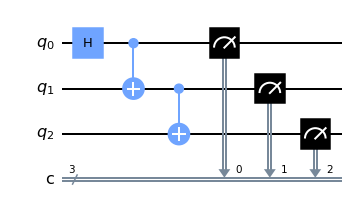

In [58]:
from qiskit import QuantumCircuit, Aer,execute
import qiskit.quantum_info as qi
qc = QuantumCircuit(3,3) # Ponemos 3 qubits y 3 bits
# Aplicamos algunas compuertas
qc.h(0) # Hadamard gate 
qc.cx(0,1) # CNOT gate
qc.cx(1,2) # CNOT gate
stv = qi.Statevector.from_instruction(qc)
for qubit in range(3):
  qc.measure(qubit,qubit)
qc.draw("mpl")

### Las compuertas cuánticas aplicadas se expresan matemáticamente del modo siguiente:

$$ 
\begin{align*} (CNOT \otimes I)(I \otimes CNOT)(I \otimes I \otimes H ) |000\rangle =\frac{1}{\sqrt{2}} (CNOT \otimes I)(I \otimes CNOT)(\ket{000}+ \ket{001}) = \frac{1}{\sqrt{2}}(CNOT \otimes I)(\ket{000}+ \ket{011}) = \frac{1}{\sqrt{2}}(\ket{000}+ \ket{111})
\end{align*}
$$


### El estado del sistema antes de las mediciones obtenido mediante qiskit es el mismo:

In [59]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

### Enseguida simulamos este circuito

{'000': 469, '111': 531}


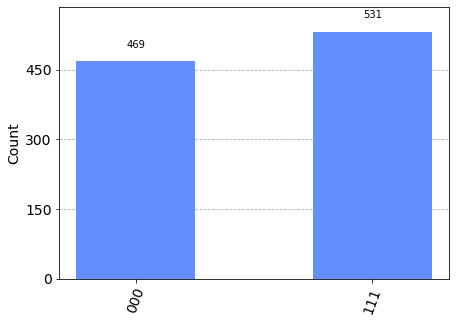

In [60]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend, shots=1000)
result = job.result()
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))

## <div align="center">**Teleportación Cuántica**</div>

### A la fecha se ha logrado teletransportar qubits a distancias mayores a 1000 Km a través de un satélite Chino. 

###Vamos a suponer que Alice tiene un qubit arbitrario que quiere compartir a Bob. En Computación Cuántica es imposible hacer una copia de un qubit (teorema de no clonación), sin embargo se lo puede compartir a Bob a costa de destruir su qubit siguiendo el protocolo siguiente:

- Suponemos que el qubit que Alice quiere compartir es 

$$ |\psi \rangle = \alpha|0\rangle + \beta|1\rangle $$

- Alice y Bob le piden a Charly que cree un par de qubits entrelazados

- Charly de da uno de esos 2 qubits entrelazados a Alice y el otro a Bob.

- Para prósitos del circuito cuántico que haremos, vamos a llamar $q_0$ a $ |\psi \rangle $, $q_1$ al qubit entrelazado de Alice y $q_2$ al qubit entrelazado de Bob

- Alice aplica una compuerta CNOT a su par de qubits $q_1q_0$

- Alice aplica una compuerta Hadamard a su qubit $q_0$

- Alice mide sus dos qubits y le pasa los resultados $C_1C_0$ a Bob por un canal clásico (con velocidad < c)

- Dependiendo de los valores $C_1C_0$ Bob aplica las operaciones cuánticas siguientes a su qubit:

<div align="center">Si $C_1C_0 = 00$ no hace nada </div>

<div align="center">Si $C_1C_0 = 01$ aplica una compuerta Z </div>

<div align="center">Si $C_1C_0 = 10$ aplica una compuerta X </div>

<div align="center">Si $C_1C_0 = 11$ aplica las compuertas ZX </div>

### A continuación vamos a programar este protocolo para simularlo. También lo podemos correr en alguna de las computadores cuánticas de IBM con alguna variante para corroborar que sí se llevó a cabo con éxito ya que no se puede conocer el estado inicial de $ |\psi \rangle$ ni el estado final de $q_2$ para compararlos(al medirlos se destruyen).





### El qubit arbitrario que Alice quiere teleportar a Bob es el siguiente:

In [78]:
import numpy as np
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import random_statevector
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))

<IPython.core.display.Latex object>

### Su representación en la esfera de Bloch es


$$ |\psi \rangle = cos\frac{\theta}{2}|0\rangle + e^{i\phi}sin\frac{\theta}{2}|1\rangle $$


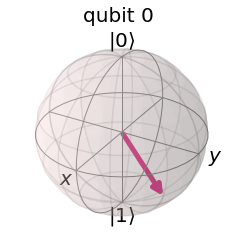

In [79]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(psi)

### Aplicando el protocolo llegamos al circuito cuántico siguiente:

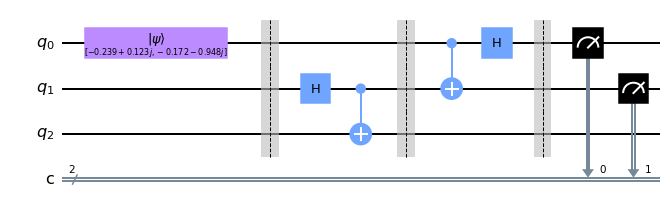

In [80]:
from qiskit import QuantumCircuit, assemble, Aer
import qiskit.quantum_info as qi
import numpy as np
import qiskit.quantum_info as qi
qc = QuantumCircuit(3,2)
qc.initialize(psi, 0) 
stv0 = qi.Statevector.from_instruction(qc)
qc.barrier()
qc.h(1) # Hadamard  
qc.cx(1,2) # CNOT 
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
stv = qi.Statevector.from_instruction(qc)
qc.measure(0,0)
qc.measure(1,1)
qc.draw("mpl")


### El estado de los 3 qubits al inicio es el siguiente. 

### Como ya dijimos, los 2 primeros qubits ($q_1q_0$) los tiene Alce y el tercero ($q_2$) lo tiene Bob.

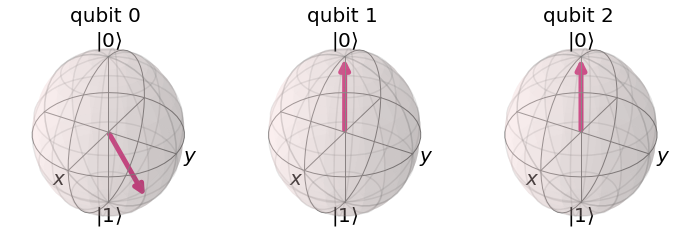

In [81]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(stv0)

### El estado del sistema justo antes de las mediciones de $q_0$ y de $q_1$ por Alice es:

In [82]:
stv.draw('latex', prefix='Estado \quad del \quad sistema \quad de \quad 3 \quad qubits \quad = \quad')

<IPython.core.display.Latex object>

### Ahora Alice mide sus 2 qubits obteniendo el resultado siguiente:

{'10': 1}


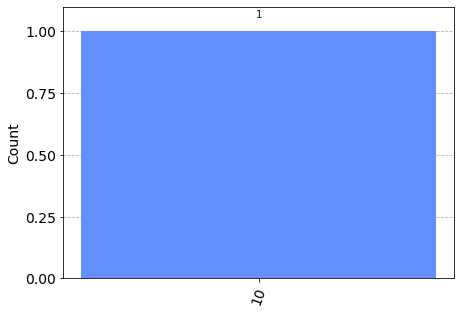

In [83]:
from qiskit import QuantumCircuit, Aer,execute
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend, shots=1)
result = job.result()
print(result.get_counts(qc))
plot_histogram(result.get_counts(qc))

### Dependiendo del resultado de los 2 bits que Alice le manda, Bob aplica las compuertas cuánticas a su qubit.


In [84]:
import qiskit.quantum_info as qi
import numpy as np
qc1 = QuantumCircuit(3,2)  
print(result.get_counts(qc))
for key in result.data(qc)["counts"]:
  if int(key,0) == 0 : 
    print("El resultado es 00")
    q2_state = [np.round(stv[0],3),np.round(stv[4],3)] 
    qc1.initialize(0, 0) 
    qc1.initialize(0, 1)   
  elif int(key,0) == 1 : 
    print("El resultado es 01")
    q2_state = [np.round(stv[1],3),np.round(stv[5],3)] 
    qc1.initialize(1, 0) 
    qc1.initialize(0, 1)    
  elif int(key,0) == 2 : 
    print("El resultado es 10")
    q2_state = [np.round(stv[2],3),np.round(stv[6],3)]
    qc1.initialize(0, 0) 
    qc1.initialize(1, 1)    
  elif int(key,0) == 3 : 
    print("El resultado es 11")
    q2_state = [np.round(stv[3],3),np.round(stv[7],3)]  
    qc1.initialize(1, 0) 
    qc1.initialize(1, 1)  
q2_normalizado = q2_state/np.linalg.norm(q2_state)
qc1.barrier()
qc1.initialize(q2_normalizado, 2) 
for key in result.data(qc)["counts"]:
  if int(key,0) == 1 : 
    qc1.z(2)
  if int(key,0) == 2 : 
    qc1.x(2)
  if int(key,0) == 3 : 
    qc1.x(2)
    qc1.z(2)
  
stv1 = qi.Statevector.from_instruction(qc1)
stv1.draw('latex', prefix='Estado \quad del \quad qubit \quad 2 = ')

{'10': 1}
El resultado es 10


<IPython.core.display.Latex object>


### Vemos que en efecto el qubit de Bob se transforma en el qubit $$ |\psi \rangle = \alpha|0\rangle + \beta|1\rangle $$ que Alice le teleportó.

### El estado final de los 3 qubits es el siguiente:

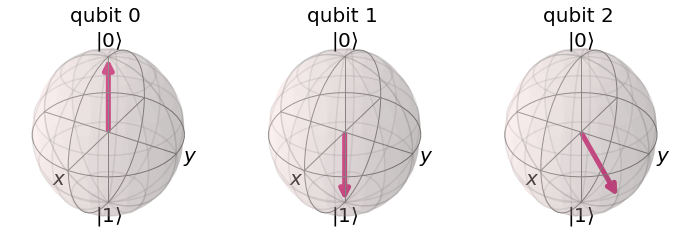

In [85]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(stv1)


### El circuito cuántico completo de la teleportación en este caso es el siguiente:

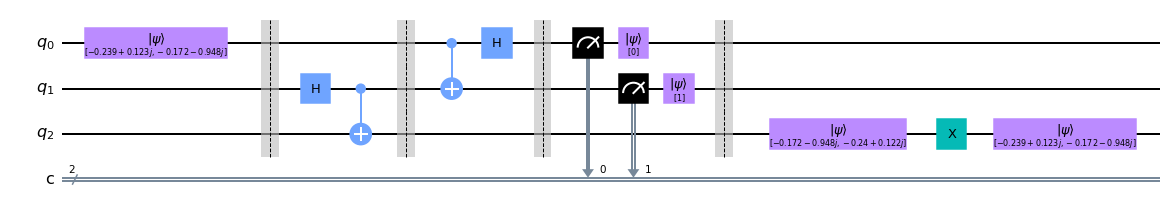

In [86]:
import qiskit.quantum_info as qi
import numpy as np
qc2 = QuantumCircuit(3,2) 
for key in result.data(qc)["counts"]:
  if int(key,0) != 0 : 
    qc2.initialize(psi, 2)
qcc = qc.compose(qc1)  
qc3 = qcc.compose(qc2)  
qc3.draw("mpl")

### <div align="center"> **Sustento Matemático del Protocolo de Teleportación**</div>


- Suponemos que el qubit que Alice quiere compartir es 

$$ \alpha|0\rangle + \beta|1\rangle $$

- Alice y Bob le piden a Charly que cree un par de qubits entrelazados

$$  \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) $$

- Charly le da uno de esos 2 qubits entrelazados (el de la derecha) a Alice y el otro a Bob 


- El estado cuántico de los 3 qubits se obtiene haciendo el producto tensorial en el que Alice posee los dos primeros qubits y Bob el tercero. 

$$ \begin{align*}
\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)\otimes ( \alpha|0\rangle+ \beta |1\rangle \\
&= \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|110\rangle + \beta|001\rangle + \beta|111\rangle) 
\end{align*}$$

- Recordemos que 

$$ CNOT \ket{00}= \ket{00}$$
$$ CNOT \ket{01}= \ket{11}$$
$$ CNOT \ket{10}= \ket{10}$$
$$ CNOT \ket{11}= \ket{01}$$


- Siguiendo el protocolo Alice aplica una compuerta CNOT a su par de qubits  $𝑞_1𝑞_0$ y enseguida una compuerta Hadamard a su qubit  $𝑞_0$. 

El resultado del estado cuántico de los 3 qubits es el siguiente:

$$ 
\begin{align*} (I \otimes I \otimes H) (I \otimes CNOT) \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|110\rangle + \beta|001\rangle + \beta|111\rangle) \\
&= (I \otimes I \otimes H) \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|110\rangle + \beta|011\rangle + \beta|101\rangle) \\
&= \frac{1}{2}  (\alpha(|000\rangle + |001\rangle + |110\rangle + |111\rangle) + \beta(|010\rangle - |011\rangle + |100\rangle - |101\rangle)) \\
\end{align*}
$$

que se puede reescribir como

$$
\begin{align*}
= \frac{1}{2}( (\alpha|0\rangle + \beta|1\rangle)\otimes|00\rangle  
+ (\alpha|1\rangle - \beta|0\rangle)\otimes|01\rangle   + (\alpha|1\rangle + \beta|0\rangle)\otimes|10\rangle  
 + (\alpha|1\rangle - \beta|0\rangle)\otimes|11\rangle  )
\end{align*}
$$

- Enseguida Alice mide sus 2 qubits y le manda el resultado de los 2 bits a través de un canal clásico 
 
Alice obtiene como resultado uno de los cuatro posibles resultados  $|00\rangle, |01\rangle, |10\rangle,$ o $|11\rangle$ con la misma probabilidad.  

El qubit de Bob se proyectará en uno de los 4 estados siguientes:

$$ |00\rangle \rightarrow (\alpha|0\rangle + \beta|1\rangle)\\
|01\rangle \rightarrow (\alpha|1\rangle - \beta|0\rangle)\\
|10\rangle \rightarrow (\alpha|1\rangle + \beta|0\rangle)\\
|11\rangle \rightarrow (\alpha|1\rangle - \beta|0\rangle)$$

- Recordemos que

$$ X \ket{0} = \ket{1}$$
$$ X \ket{1} = \ket{0}$$

y


$$ Z \ket{0}= \ket{0} $$
$$ Z \ket{1}= -\ket{1} $$


- Dependiendo de los valores $C_1C_0$ Bob aplica las operaciones cuánticas siguientes a su qubit:

<div align="center">Si $C_1C_0 = 00$ Bob no hace nada </div>

<div align="center">Si $C_1C_0 = 01$ Bob aplica una compuerta Z a su qubit</div> 

<div align="center">Si $C_1C_0 = 10$ Bob aplica una compuerta X a su qubit</div>

<div align="center">Si $C_1C_0 = 11$ Bob aplica las compuertas ZX a su qubit </div>

- Al final el estado del qubit de Bob será 

<div align="center"> $|q_2\rangle= \alpha|0\rangle + \beta|1\rangle$ </div>